# PYDA 45 KEA Итоговый проект Python для анализа данных

# Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
<br>
Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты

#### PRE. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

# графический функционал
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

# функционал Статистики
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu


# импортируем LDA/LR-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#### Глобальные переменные

In [2]:
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)

# можно с GitHub, но не обязательно - URL на всякий случай
# url = 'https://raw.githubusercontent.com/NewAvalon-git/PYDA45/main/10%20%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%20Python%20%D0%B4%D0%BB%D1%8F%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/HR.csv'


https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1


## 1. Загрузите файл HR.csv в pandas dataframe
**Баллы 5**

загрузим данные

In [3]:
df_hr_full = pd.read_csv(url)

изучим данные

In [4]:
df_hr_full.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


* Для удобства дальнейшей группировки и обработки введем ID.
* Предположим, что одна строка = один сотрудник

In [5]:
df_hr_full = df_hr_full.reset_index().rename(columns={'index': 'ID'})
df_hr_full

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df_hr_full.shape

(14999, 11)

In [7]:
df_hr_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [8]:
df_hr_full.describe()

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3749.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7499.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11248.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Задание 1. Вывод. 

* пропусков нет - хорошо
* типы определились нормльно (соответствуют смыслу данных в колонках)
* типы для:
<br>
work_accident, left, promotion_last_5years
= int64, по смыслу - boolean
<br>Если потребуется, поменяем позже

## 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
**Баллы 10**

### Задание 2. Решение / подход.

* не понятна буквальная постановка вопроса: что такое "переменные"?
Предположим, по контексту, что речь идет о столбцах (series)
* сделаем универсальную функцию, которая будет считать статистики по все числовым столбцам
* на выходе: DF - по структуре схожий с результатом df.describe()

#### Функция для расчета статистик
* Помимо статистик из задания дополнено еще некоторыми статистиками (понадобились на дальнейших шагах)
* Сделанная фукнция - аналог decribe

In [9]:
def all_statitistic(df):
    '''
    Расчет базовых статистик переданного DF
    При необходимости можно дополнять какие-то еще специальные статистики
    
    Статистики считаются для всех числовых столбцов
    '''
    
    # структура результирующего DF
    # новые статистик дополнять тут (строка DF) и далее в блоки расчет / сохранение
    df_res = pd.DataFrame(
        {
            'Statistic' : [
                'count',
                'mean',
                'median',
                'mode',
                'min',
                'max',
                'std'
            ]
        })
    
    # список числов типовых данных
    number_types = ['float64', 'int64', 'float', 'int']
    
    for col_ in df.columns:
        
        # проверка типа "числовой"
        if df[col_].dtype in number_types:
            
            # Расчет статистик
            sr = df[col_] # через переменную сократим писанину далее
            
            count_ = sr.count(),
            mean = sr.mean()
            median = sr.median()
            mode = sr.mode()[0]
            min_ = min(sr)
            max_ = max(sr)
            std = sr.std()
            
            # Сохранение в df_res
            df_res[col_] = [
                count_[0],
                mean,
                median,
                mode,
                min_,
                max_,
                std
            ]
        else:
            next
            
    return df_res.set_index('Statistic')

### Задание 2. Вывод / Ответ

In [10]:
d_stat = all_statitistic(df_hr_full)
d_stat = d_stat.loc[ : , d_stat.columns != 'ID'] # ID бессмысленна для целей задачи
d_stat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Statistic,,,,,,,,
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281


Можно свериться со стандартной функцией

In [11]:
d_desc = df_hr_full.loc[ : , df_hr_full.columns != 'ID'].describe()
d_desc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


ленивая проверка (не чистил лишние показатели)

In [12]:
d_stat - d_desc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Рассчитайте и визуализировать 
корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

**Баллы 10**

### Задание 3. Решение / подход.

* По количественными переменными понимаем не булевы и не object

Выберем эти: - количественные и непрерывные <br>
* satisfaction_level - Уровень удовлетворенности работой
* last_evaluation - Время с момента последней оценки в годах
* number_projects - Количество проектов, выполненных за время работы
* average_monthly_hours - Среднее количество часов на рабочем месте в месяц
* time_spend_company - Стаж работы в компании в годах

Эти не берем - по сути - это "да/нет": <br>
* work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
* left - уволился ли сотрудник
* promotion_last_5years - повышался ли сотрудник за последние пять лет

In [13]:
# не требуется - сохранено для тестов со всеми столбцами (околонулевые корреляции)

# qty_var_list= ['satisfaction_level', 
#                'last_evaluation', 
#                'number_project', 
#                'average_montly_hours', 
#                'time_spend_company',
#                'Work_accident',
#                'left',
#                'promotion_last_5years']

Список столбцов для определения корреляции

In [14]:
qty_var_list= ['satisfaction_level', 
               'last_evaluation', 
               'number_project', 
               'average_montly_hours', 
               'time_spend_company']

**Расчет корреляционной матрицы**

In [15]:
df_corr = df_hr_full[qty_var_list].corr() #.reset_index()
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


Глазами определить какая больше, какая меньше коррелирует можно по матрице, но лучше визуализировать

<Axes: >

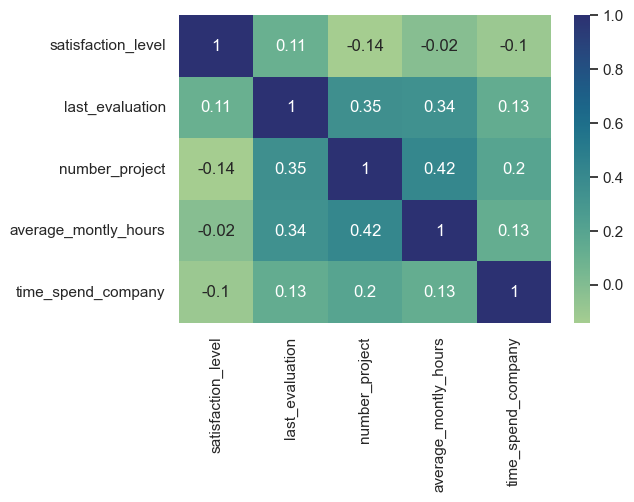

In [16]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_corr, annot=True, cmap='crest')

**Наиболее и наименее коррелирующие переменные**
* Для упрощения определения, преобразуем корреляционную матрицу через melt
* Чем ближе |r| к единице, тем сильнее линейная связь между случайными величинами
* Если |r| = 0, то связи либо нет, либо она не линейная (надо будет проверить графически)

In [17]:
df_corr_melt = (df_corr
                .reset_index()
                .melt(id_vars=['index'])
                .sort_values(by = 'value'))
df_corr_melt['value_abs'] = abs(df_corr_melt['value'])
 
df_corr_melt.loc[~(df_corr_melt['value'] == 1)].sort_values(by = 'value_abs')

,index,variable,value,value_abs
15,satisfaction_level,average_montly_hours,-0.020048,0.020048
3,average_montly_hours,satisfaction_level,-0.020048,0.020048
4,time_spend_company,satisfaction_level,-0.100866,0.100866
20,satisfaction_level,time_spend_company,-0.100866,0.100866
1,last_evaluation,satisfaction_level,0.105021,0.105021
5,satisfaction_level,last_evaluation,0.105021,0.105021
23,average_montly_hours,time_spend_company,0.127755,0.127755
19,time_spend_company,average_montly_hours,0.127755,0.127755
9,time_spend_company,last_evaluation,0.131591,0.131591
21,last_evaluation,time_spend_company,0.131591,0.131591


### две самые скоррелированные
average_montly_hours / number_project = 0.417211
<br> last_evaluation / number_project = 0.349333	

In [18]:
sns.set(rc={'figure.figsize':(12, 3)})

**визуализация** average_montly_hours / number_project 

<Axes: xlabel='average_montly_hours', ylabel='number_project'>

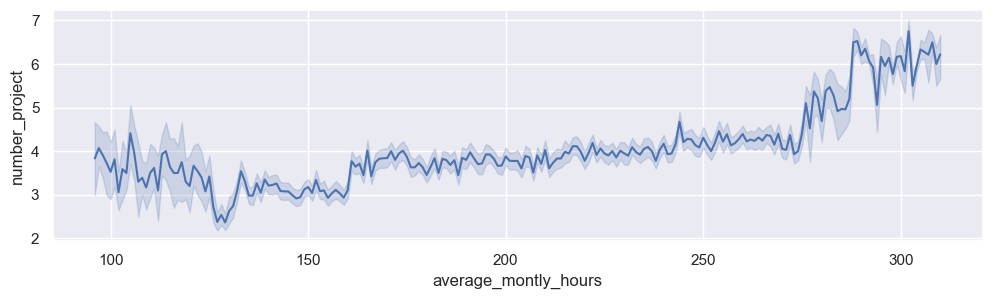

In [19]:
sns.lineplot(x = 'average_montly_hours', 
             y = 'number_project',
             data = df_hr_full)

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

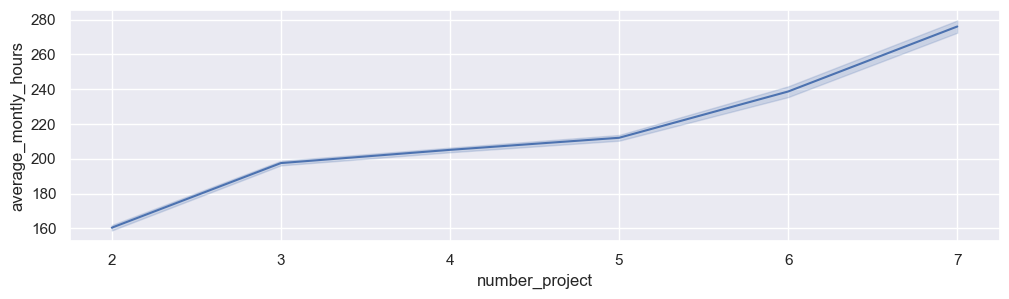

In [20]:
sns.lineplot(y = 'average_montly_hours', 
             x = 'number_project',
             data = df_hr_full)

**визуализация** last_evaluation / number_project

<Axes: xlabel='last_evaluation', ylabel='number_project'>

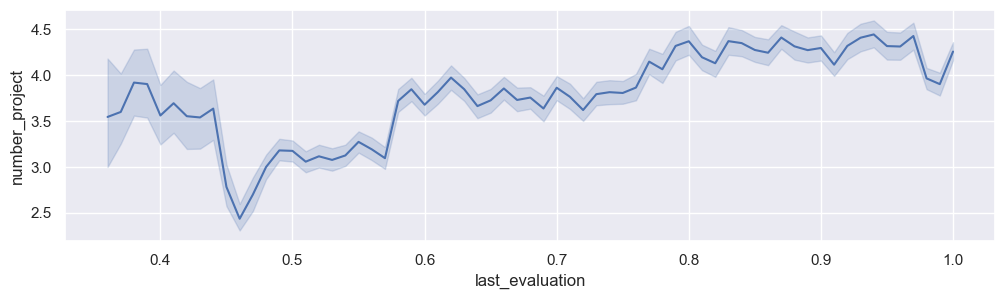

In [21]:
sns.lineplot(x = 'last_evaluation', 
             y = 'number_project',
             data = df_hr_full)

<Axes: xlabel='number_project', ylabel='last_evaluation'>

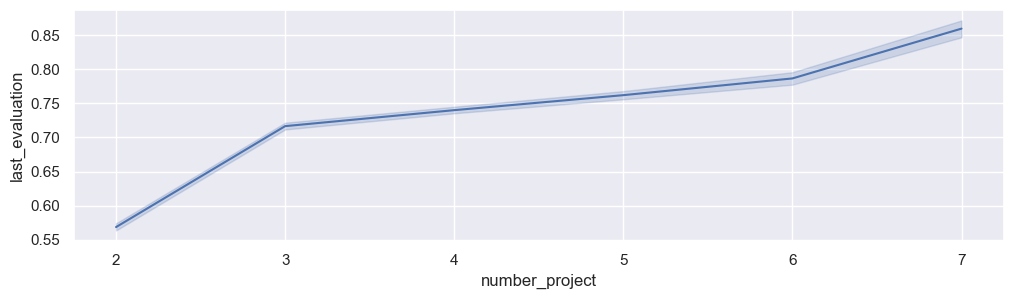

In [22]:
sns.lineplot(y = 'last_evaluation', 
             x = 'number_project',
             data = df_hr_full)

### две наименее скоррелированные
satisfaction_level / average_montly_hours = -0.020048	
<br> time_spend_company / satisfaction_level = -0.100866

**визуализация** satisfaction_level / average_montly_hours

<Axes: xlabel='satisfaction_level', ylabel='average_montly_hours'>

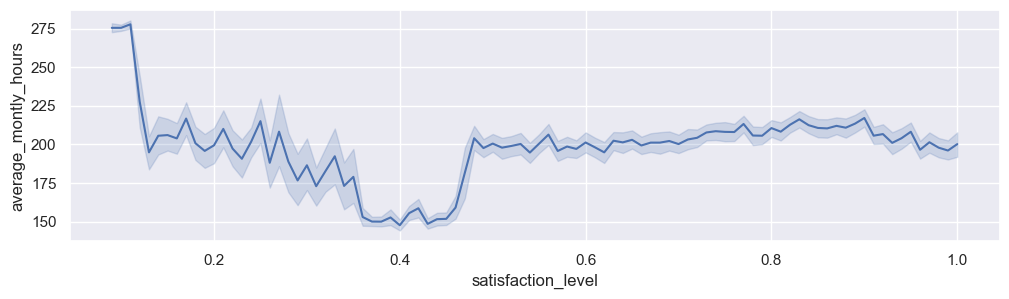

In [23]:
sns.lineplot(x = 'satisfaction_level', 
             y = 'average_montly_hours',
             data = df_hr_full)

<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

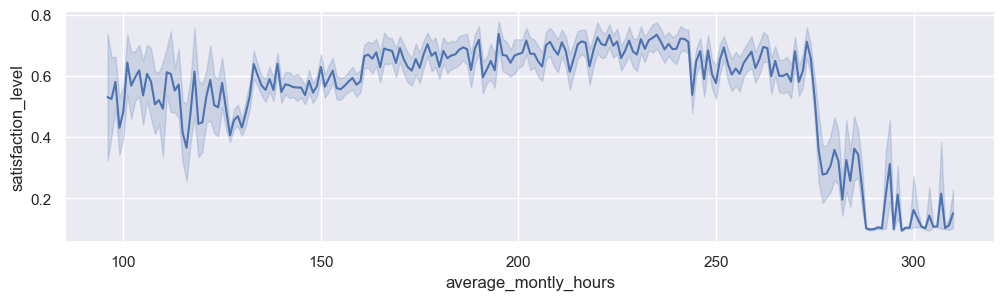

In [24]:
sns.lineplot(y = 'satisfaction_level', 
             x = 'average_montly_hours',
             data = df_hr_full)

**визуализация** time_spend_company / satisfaction_level

<Axes: xlabel='time_spend_company', ylabel='satisfaction_level'>

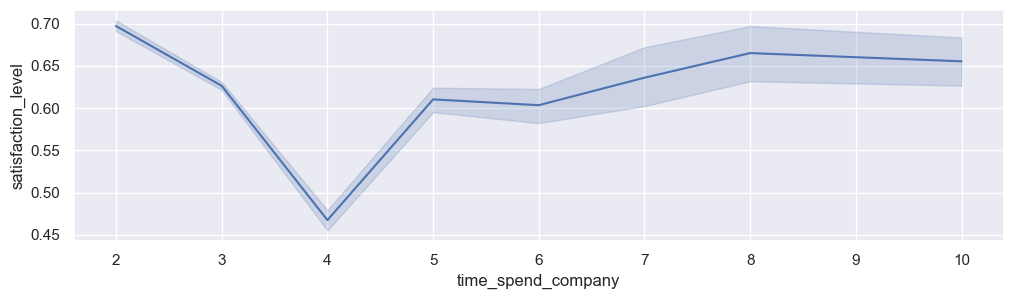

In [25]:
sns.lineplot(x = 'time_spend_company', 
             y = 'satisfaction_level',
             data = df_hr_full)

<Axes: xlabel='satisfaction_level', ylabel='time_spend_company'>

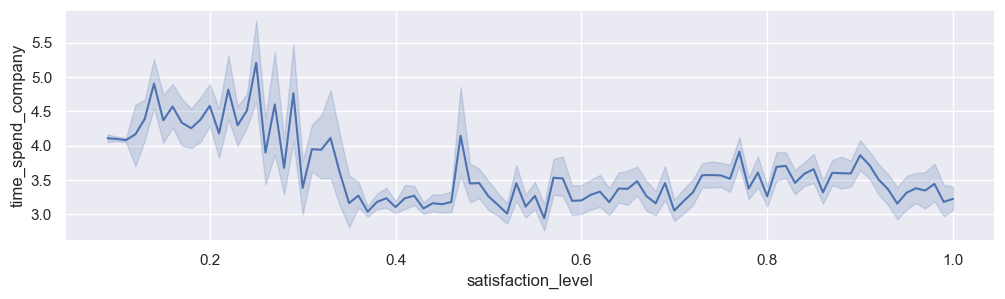

In [26]:
sns.lineplot(y = 'time_spend_company', 
             x = 'satisfaction_level',
             data = df_hr_full)

### Задание 3. Вывод.

* рассчитать и визуализировать корреляционную матрицу

см. расчет выше (в начале задания)

* Определите две самые скоррелированные и две наименее скоррелированные переменные.

**две самые скоррелированные:**
1) average_montly_hours / number_project = 0.417211
2) last_evaluation / number_project = 0.349333	


**две наименее скоррелированные:**
1) average_montly_hours / satisfaction_level = -0.020048	
2) time_spend_company / satisfaction_level = -0.100866



## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.
**Баллы 5**

### Задание 2. Решение / подход.

* Уточнение. В описании DF не сообщается, что отдельная строка = отдельный сотрудник
* Прямых признаков указывающих на это нет (PERSONAL_ID, напримр). Имеем косвенный признак, типа:
<br> left - уволился ли сотрудник
<br> promotion_last_5years - повышался ли сотрудник за последние пять лет
<br> department - отдел в котором работает сотрудник
* По этим признакам предположим, что действительно: **отдельная строка = отдельный сотрудник**

In [27]:
len(df_hr_full)

14999

In [28]:
gr_dep = (df_hr_full.groupby(['department'])
       .agg({'ID' : 'count'})
          
      )
display(gr_dep)
display(gr_dep.sum())

,ID
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


ID    14999
dtype: int64

### Задание 4. Вывод.

см решение

## 5. Показать распределение сотрудников по зарплатам.
**Баллы 5**

In [29]:
gr_salary = (df_hr_full.groupby(['salary']).agg({'ID' : 'count'})).reset_index()
display(gr_salary)
gr_salary['ID'].sum()

,salary,ID
0,high,1237
1,low,7316
2,medium,6446


14999

**5.1** Всего три значения, поле категориальное. Поэтому используем гистограмму.

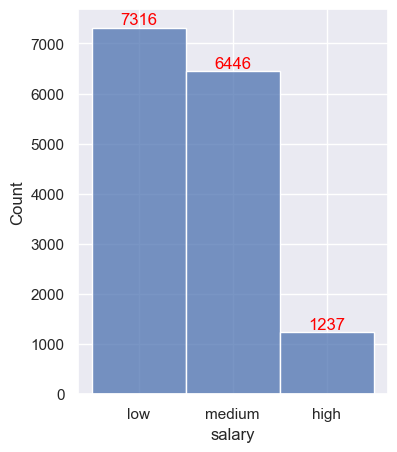

In [30]:
sns.set(rc={'figure.figsize':(4, 5)})

diag_51 = sns.histplot(
    data = df_hr_full, 
    x = 'salary'
)

for index, row in gr_salary.iterrows():
    diag_51.text(row['salary'], row.ID, round(row.ID, 2), color='red', va = 'bottom', ha='center')

**5.2** Можно так, но информативности меньше

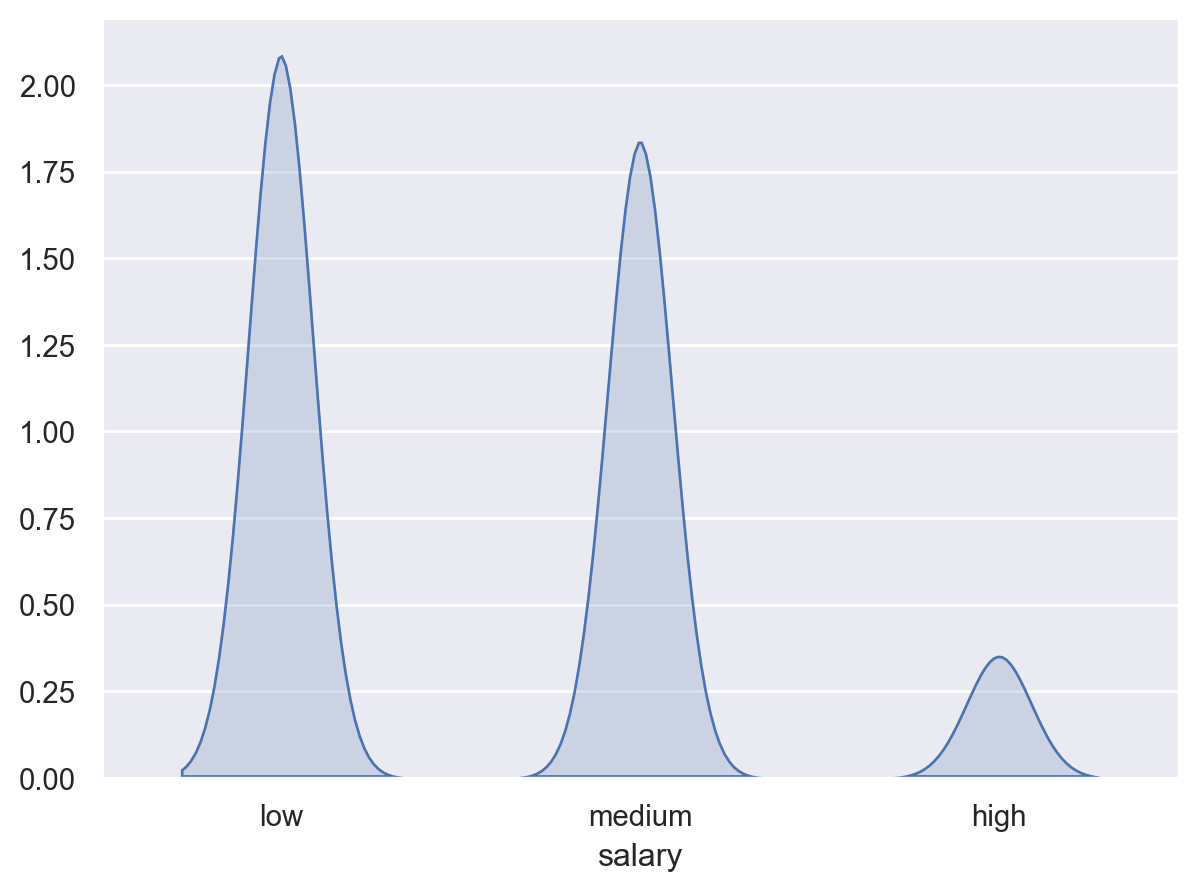

In [31]:
diag_52 = so.Plot(df_hr_full, 
            x = "salary")
diag_52.add(so.Area(), so.KDE())

**5.3** Совместим

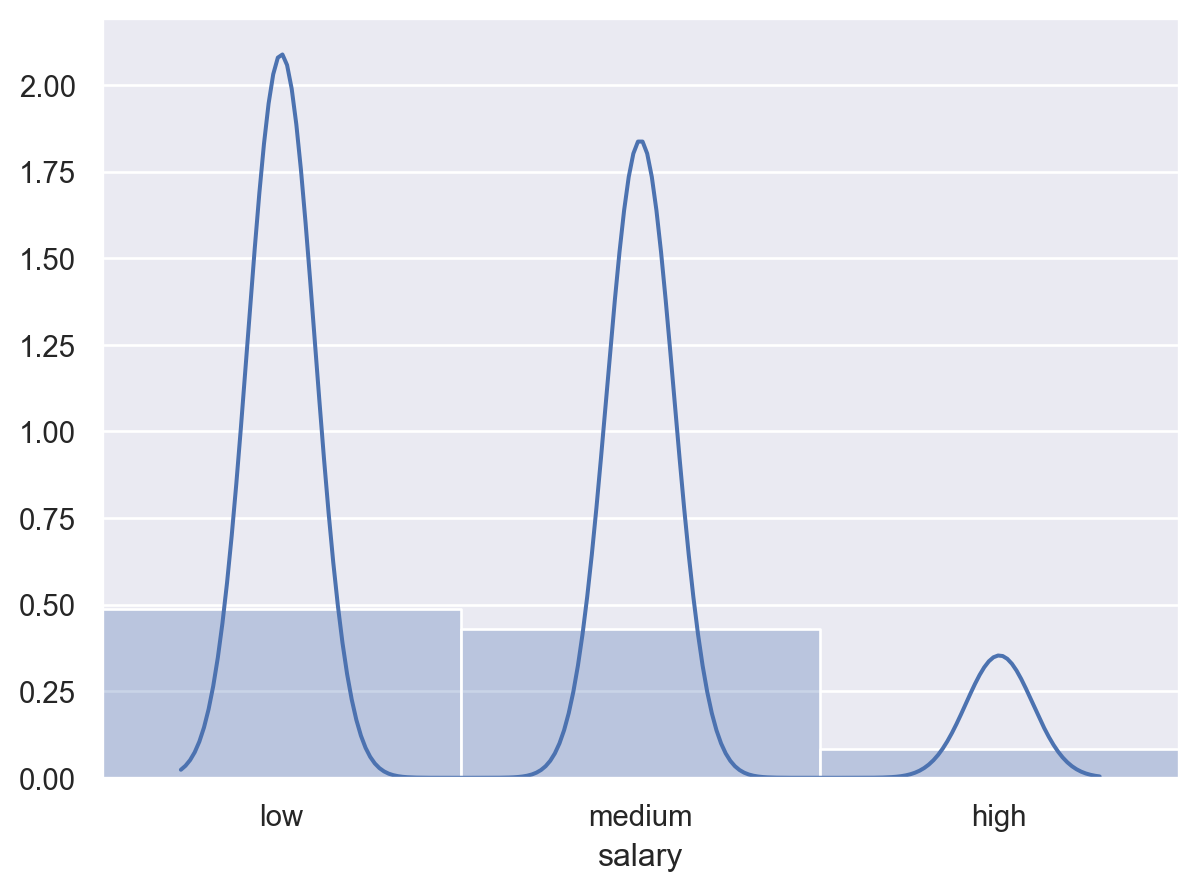

In [32]:
diag_53 = diag_52.add(so.Bars(alpha=.3), so.Hist("density"))
diag_53.add(so.Line(), so.KDE())

### Задание 5. Вывод.
см. гистограмму выше (**5.1**)
* высокие зарплаты у меньшинства
* низкие у большинства (чуть больше, чем средние)

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
**Баллы 5**

**6.1** Разместим все графики в одном окне

In [33]:
gr_dep_salary = ((df_hr_full.groupby(['department','salary'])
                  .agg({'ID' : 'count'}))
                 .sort_values(by = ['department','salary'])
                )
# gr_dep_salary

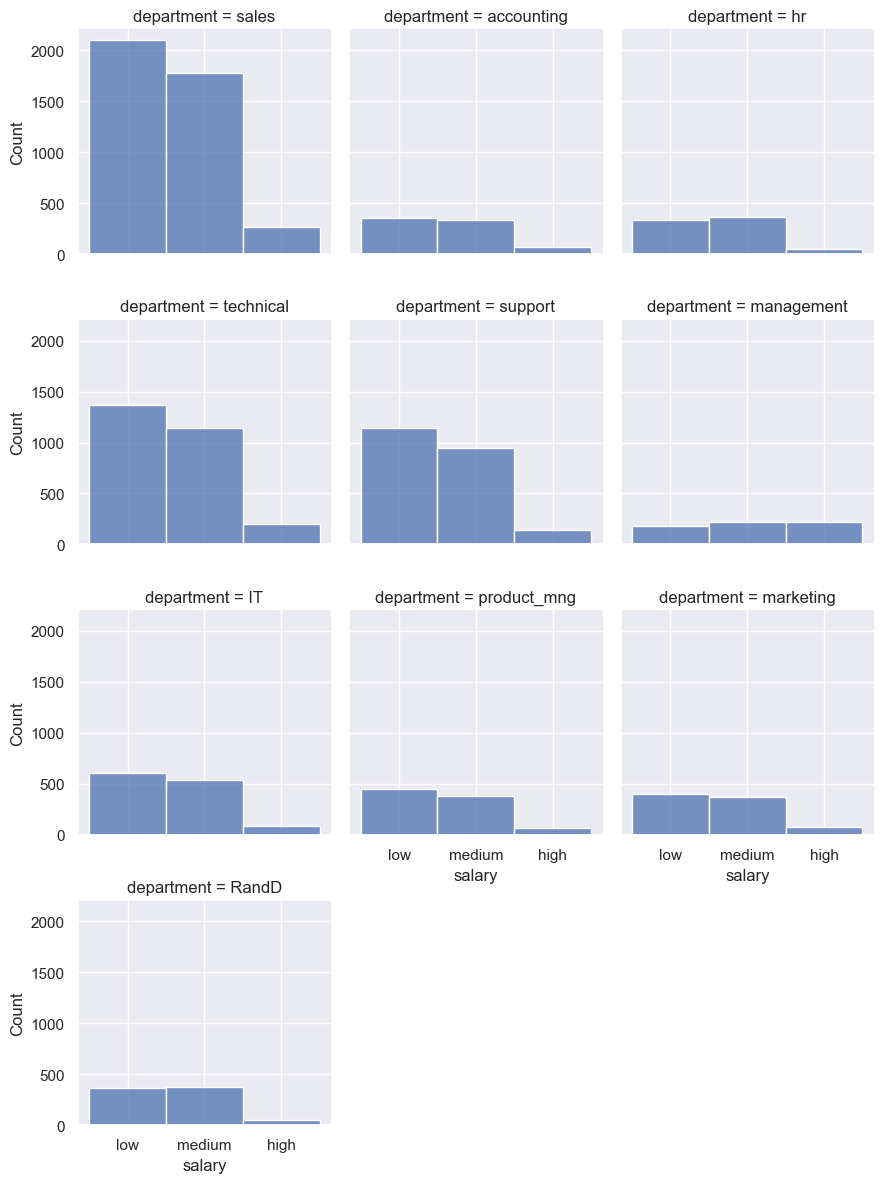

In [34]:
tips = df_hr_full
diag_61 = sns.FacetGrid(tips, col='department', col_wrap = 3)
diag_61.map(sns.histplot, 'salary')

**6.2** Для эксперимента еще проаналлизируем одинаковые категории между департаментами. Посмотрим на абсолюты, но при такой визуализации лучше смотреть относительные показатели типа доля деп-та в доле по категории

In [35]:
gr_dep_salary62 = df_hr_full.groupby(['department','salary']).agg({'ID' : 'count'}).reset_index()
# gr_dep_salary62

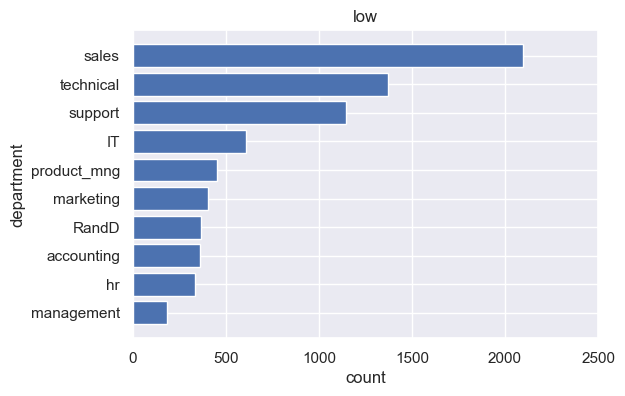

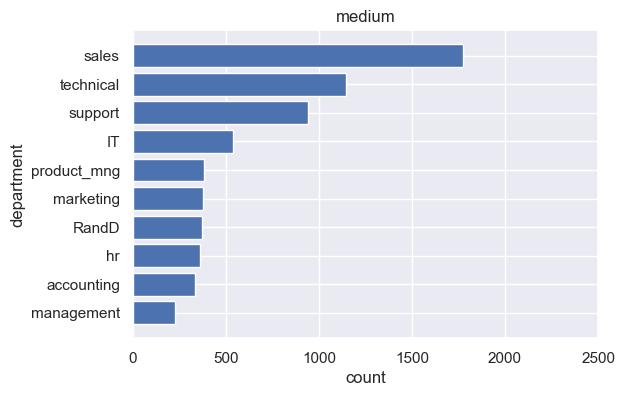

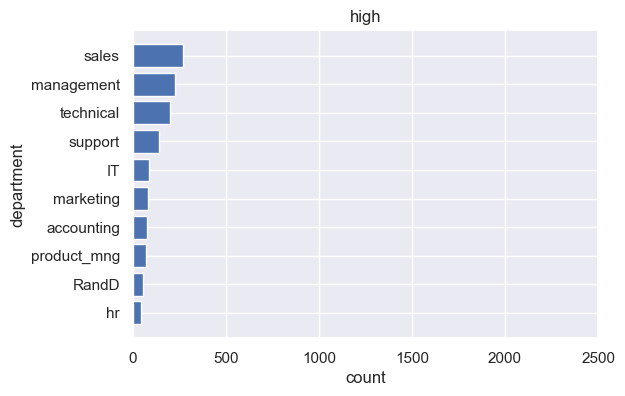

In [36]:
sns.set(rc={'figure.figsize':(6, 4)})

# множество salary для построения отдельных графиков по типу salary
set_salary_category = set(gr_dep_salary62['salary'])

# строим график по каждой категории salary в разрезе департаментов
for cat in set_salary_category:
    salary_category = (gr_dep_salary62
                       .loc[(gr_dep_salary62['salary'] == cat)]
                       .sort_values(by = 'ID')
                      )
    plt.barh(
        salary_category['department'], 
        salary_category['ID']
    )
    plt.title(cat)
    plt.xlabel('count')
    plt.ylabel('department')
    plt.xlim([0, 2500])
    plt.show()

### Задание 6. Вывод.

см. гистограмму выше (**6.1**)

Напрашивается выделение некоторых категорий департаментов по признаку баланса salary для дальнейших ислледований сбалансированности оплаты труда
1) High  > Medium >> Low (4 графика): sales, technical, IT, product_mng,
2) High ~= Medium >> Low (4 графика): accounting, RandD, marketing
3) High  < Medium >> Low  (1 график): hr
4) High ~= Medium ~= Low (1 график): management

## 7. Проверить гипотезу, 
что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

**Баллы 10**

#### Формируем статистические гипотезы
* **H0** - средние **НЕ** отличаются. Разницы НЕТ по времени на работе между "высокими" и "низкими" окладами
* **H1** - средние **Отличаются**. Разница ЕСТЬ по времени на работе между "высокими" и "низкими" окладами

Подготовим выборки

In [37]:
df_low = df_hr_full[['average_montly_hours', 'salary']].loc[(df_hr_full['salary'].isin(['low']))]
df_high = df_hr_full[['average_montly_hours', 'salary']].loc[(df_hr_full['salary'].isin(['high']))]
df_high_low = df_hr_full[['average_montly_hours', 'salary']].loc[(df_hr_full['salary'].isin(['high', 'low']))]
# df_low
# df_high

### 7.1 Рассмотрим всю совокупность

#### Посмотрим статистики
* На первый взгляд, средние очень близки.
* Смущает, что есть сильная разница в модах

In [38]:
df_avg_hours_compare = pd.merge(
                                all_statitistic(df_high).reset_index(), 
                                all_statitistic(df_low).reset_index(),
                                how = 'inner',
                                left_on = 'Statistic',
                                right_on = 'Statistic',
                                suffixes=("_high", "_low")
                            )

df_avg_hours_compare['delta_abs'] = df_avg_hours_compare.apply(
    lambda x: x['average_montly_hours_high'] - x['average_montly_hours_low'], axis = 1)
df_avg_hours_compare['delta_perc'] = df_avg_hours_compare.apply(
    lambda x: x['average_montly_hours_high'] / x['average_montly_hours_low'], axis = 1)

df_avg_hours_compare

,Statistic,average_montly_hours_high,average_montly_hours_low,delta_abs,delta_perc
0,count,1237.000000,7316.000000,-6079.000000,0.169081
1,mean,199.867421,200.996583,-1.129162,0.994382
2,median,199.000000,199.000000,0.000000,1.000000
3,mode,180.000000,135.000000,45.000000,1.333333
4,min,96.000000,96.000000,0.000000,1.000000
5,max,307.000000,310.000000,-3.000000,0.990323
6,std,47.710446,50.832214,-3.121769,0.938587


Проверим профили распределеия **визуально** на нормальность
<br> (не выглядит нормальным)

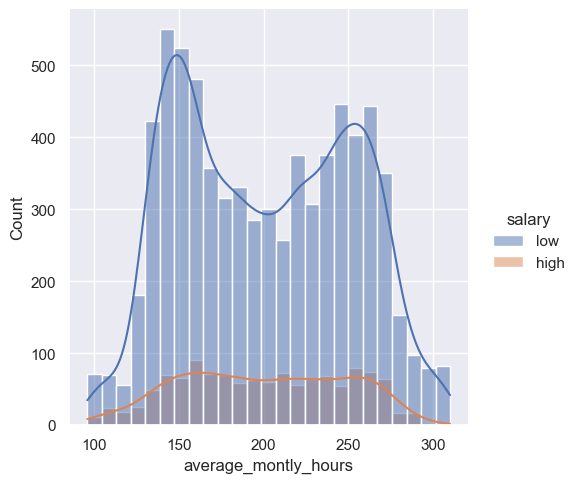

In [39]:
# Посмотрим профиль распределения
aa = sns.displot(
    df_high_low[['average_montly_hours', 'salary']],
    x = 'average_montly_hours',
    hue = 'salary',
    kde=True)

И тут разница не просматривается

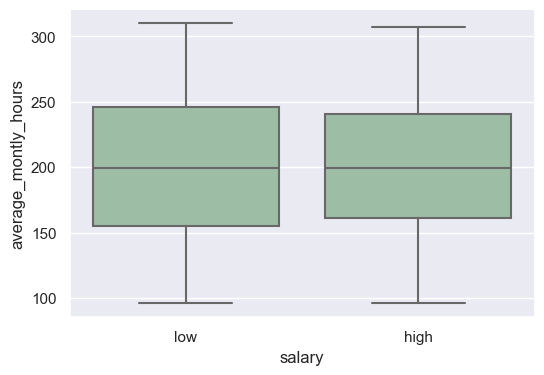

In [40]:
ax = sns.boxplot(x='salary', y='average_montly_hours', data=df_high_low, color='#99c2a2')
plt.show()

Проверим **нормальное** ли распределение расчетным способом 

**в обоих случаях подвтерждено не нормальное распределение**

In [41]:
stat, p = stats.shapiro(df_high['average_montly_hours'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.971, p=0.000
Вероятно не нормальное распределение


In [42]:
stat, p = stats.shapiro(df_low['average_montly_hours'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.960, p=0.000
Вероятно не нормальное распределение


C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Распределение не нормальное
Поэтому применим критерий Манна-Уитни

In [43]:
stat, p = (
    mannwhitneyu(
        df_high['average_montly_hours'],
        df_low['average_montly_hours'])
    )
     
print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=4507096.500, p=0.824
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


**NB** На всей совокупности разницы нет

#### еще эксперименты = построим доверительный интервал

In [44]:
ci_lower, ci_upper = stats.norm.interval(
    confidence=0.90, 
    loc = np.mean(df_low['average_montly_hours']), 
    scale = stats.sem(df_low['average_montly_hours']))

# df_low_interval = df_low[(df_low['average_montly_hours'].between(ci_lower, ci_upper))]
print(f'Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.3f} и {ci_upper:5.3f}')

Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между 200.019 и 201.974


In [45]:
ci_lower, ci_upper = stats.norm.interval(
    confidence=0.90, 
    loc = np.mean(df_high['average_montly_hours']), 
    scale = stats.sem(df_high['average_montly_hours']))
print(f'Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.3f} и {ci_upper:5.3f}')

Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между 197.636 и 202.099


### 7.2 Нормализуем выборку с применением бутстрап

<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

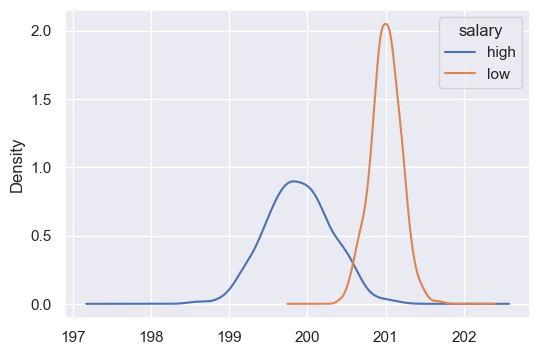

In [46]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, возможно сможем применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = df_high_low.sample(
        frac = 10, 
        replace = True
    ).groupby('salary')['average_montly_hours'].mean() 
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

Проверим равенство дисперсий

(нет не равны)

In [47]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [48]:
stat, p = f_test(boot_1d['high'], boot_1d['low'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=4.622, p=0.00000
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


#### проверим гипотезу на преобразованных через бутстрап данных

(и тут уже есть отличия, но не в сторону гипотезы)

In [49]:
stat, p = (
    mannwhitneyu(
        boot_1d['high'],
        boot_1d['low'])
    )
     
print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=8619.000, p=0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


### Задание 7. Вывод.

**Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

Проверено в два этапа

#### 7.1
Проверка на всей совокупности через критерий Манна-Уитни. Разницы статистически значимой нет.

**Гипотеза не подтверждена**

#### 7.2
Проверка после обработки bootstrap через критерий Манна-Уитни. 
Выявилась разница. Но оказалось (график), что с "более высоким" окладом проводят даже **меньше** времени на работе и это статистически значимо.


**Но именно Гипотеза "выше - больше" не подтверждена**

## 8. Рассчитать следующие показатели 
среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

**Баллы 10**

In [50]:
df_hr_full.pivot_table(
    index = 'left',
    aggfunc = {'promotion_last_5years' : [lambda col_: col_.sum() /  col_.count()], #SUM т.к. повышение = 1.
               'satisfaction_level' : 'mean',
               'number_project' : 'mean'
              }).rename(columns = {
                        'number_project' : 'Среднее количество проектов',
                        'satisfaction_level' : 'Средняя степень удовлетворенности',
                        'promotion_last_5years' : 'Доля сотрудников с повышением за последние 5 лет'}
                       
                       )


,Среднее количество проектов,Доля сотрудников с повышением за последние 5 лет,Средняя степень удовлетворенности
,mean,<lambda>,mean
left,,,
0,3.786664,0.026251,0.666810
1,3.855503,0.005321,0.440098


In [51]:
# проверим, что в целом promotion_last_5years - маленькая группа
print(sum(df_hr_full['promotion_last_5years'] == 1))
print(sum(df_hr_full['promotion_last_5years'] == 0))
print(df_hr_full['promotion_last_5years'].count())

319
14680
14999


In [52]:
# promotion_last_5years - доля ~2,1% всей выборки
319 / 14999

0.021268084538969265

### Задание 8. Вывод.

* см. таблицу с данными выше
<br> **Наблюдения**

1) уволившиеся вели немного больше проектов (среднее) - может нагрузка - одна из причин увольнения?
2) среди уволившихся доля повышений за последние 5 лет ощутимо меньше относительно не уволившихся (хотя в целом доля повышений по всему DF не выглядит большой (~2%)
3) Степень удовлетворенности среди оставшихся заметно выше, чем у уволившихся (внезапно, да? :) )

## 9. Разделить данные на тестовую и обучающую выборки
* Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
* Оценить качество модели на тестовой выборки

**Баллы 20**

#### LDA

In [53]:
lda = LinearDiscriminantAnalysis()

In [54]:
# разделяем выборку на тренировочную и тестовую
# не включаем в выборку параметры, которые не должны использоваться для обучения:
# 'department', 'salary', 'left', 'ID'
X_train, X_test, y_train, y_test = train_test_split(
    df_hr_full.loc[:,(~df_hr_full.columns.isin(['department', 'salary', 'left', 'ID']))],
    df_hr_full['left'],
    random_state = 42)

In [55]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [56]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

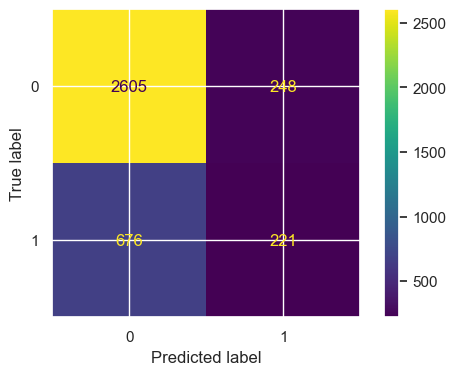

In [57]:
cm = confusion_matrix(y_test, y_pred, labels = lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = lda.classes_)

disp.plot()
# plt.show()

In [58]:
print('true negatives C0,0: ', cm[0, 0])
print('true positives is C1,1: ', cm[1, 1])
print('false negatives is C1,0: ', cm[1, 0])
print('false positives is C0,1: ', cm[0, 1])
print('Всего строк ', sum(sum(cm)))

print('\nSUM TRUE ', cm[0, 0] + cm[1, 1])
print('SUM FALSE ', cm[1, 0] + cm[0, 1])

print('TRUE / SUM ', round((cm[0, 0] + cm[1, 1]) / sum(sum(cm)),5))

true negatives C0,0:  2605
true positives is C1,1:  221
false negatives is C1,0:  676
false positives is C0,1:  248
Всего строк  3750

SUM TRUE  2826
SUM FALSE  924
TRUE / SUM  0.7536


In [59]:
accuracy_score(y_test, y_pred)

0.7536

In [60]:
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

### Задание 9. Вывод.

**9.1. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)**

см. выше

**9.2. Оценить качество модели на тестовой выборки**

Оценено с помощью confusion_matrix и accuracy_score
<br> Точность 75,4% 

## 10. Загрузить jupyter notebook с решение на github и прислать ссылку
**Баллы 5**

### Задание 10. Вывод.

Загружено на github

* Итого - максимум 85 баллов
* Для зачета необходимо набрать минимум 55